# Data analysis for Netflix TV Shows and Movies

# Objectives

- Clean Data for visualization
- Exploratory data analysis for useful insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data cleansing and manipulation

In [2]:
df = pd.read_csv('NetflixData.csv')
# Removed show id, setting title as index for df and transforming date_added to type datetime
df.drop(columns=['show_id','description'],inplace=True)
df = df.set_index('title')
df['date_added'] = pd.to_datetime(df['date_added'])
df.rename(columns={'listed_in':'categories'},inplace=True)
print("Dataframe shape: ",df.shape)
df.head()

Dataframe shape:  (8807, 9)


,type,director,cast,country,date_added,release_year,rating,duration,categories
title,,,,,,,,,
Dick Johnson Is Dead,Movie,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
Blood & Water,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
Jailbirds New Orleans,TV Show,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
Kota Factory,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [4]:
df['release_year'].min()

1925

In [43]:
df.dtypes

type                    object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
categories              object
dtype: object

### 1. Null values transformation

In [4]:
print(df.isnull().sum())

type               0
director        2634
cast             825
country          831
date_added        84
release_year       0
rating             4
duration           3
categories         0
dtype: int64


In [44]:
# Dropping missing values for country, duration and date_added columns
df.dropna(subset=['country','date_added','duration'],inplace=True)
print(df.isnull().sum())

type               0
director        2155
cast             661
country            0
date_added         0
release_year       0
rating             3
duration           0
categories         0
dtype: int64


### 2. Duplicates transformation

In [45]:
df_duplicated = df[df.duplicated()]
print("Number of duplicated rows: ",df_duplicated.shape[0])

print("Dataframe before dropping duplicates: ",df.shape)
df = df.drop_duplicates()
print("Dataframe after dropping duplicates: ",df.shape)

Number of duplicated rows:  7
Dataframe before dropping duplicates:  (7893, 9)
Dataframe after dropping duplicates:  (7886, 9)


## Exploratory Data Analysis

### 1. Movie types

Text(0.5, 1.0, 'TV Shows and Movies proportion')

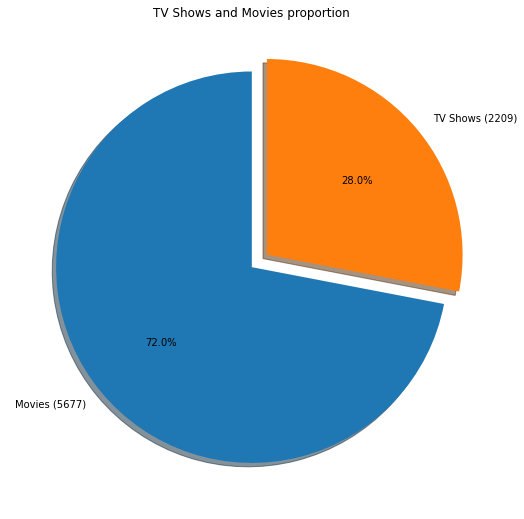

In [40]:
netflix_types = df['type'].value_counts()
labels = ['Movies (' + str(netflix_types[0]) + ')',
          'TV Shows (' + str(netflix_types[1]) + ')']

fig = plt.figure(figsize=(18,9))
plt.pie(x=netflix_types,labels=labels,shadow=True,
        radius=1,startangle=90,explode=(0,0.1),autopct='%1.1f%%')
plt.title("TV Shows and Movies proportion")

### 2. Country percentage

In [8]:
df_countries = df['country'].value_counts(ascending=False).head(20)
df_other_countries = df.shape[0] - df_countries.sum()
df_other_countries = pd.Series([df_other_countries],index=['Other countries'])
df_countries = df_countries.append(df_other_countries)

<AxesSubplot:title={'center':'Number of entries per country'}, xlabel='Countries', ylabel='Frequency'>

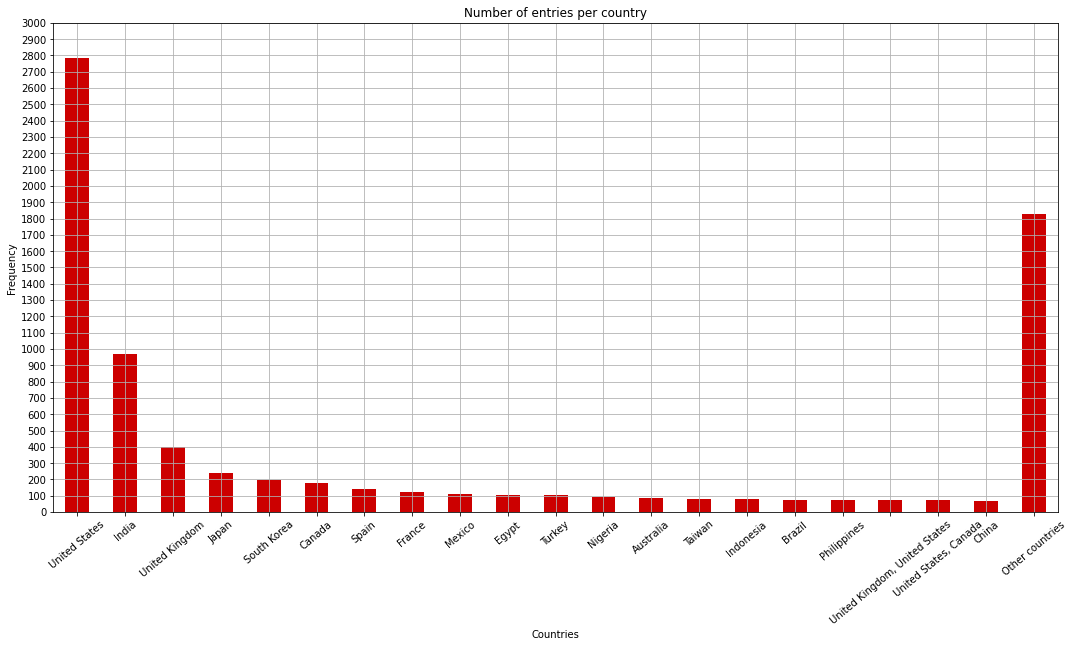

In [9]:
grid_lines = np.linspace(0.0,3000,31)
df_countries.plot.bar(rot=40,yticks=grid_lines,figsize=(18,9),grid=True,
                      title="Number of entries per country",xlabel="Countries",ylabel="Frequency",
                      color=["#CC0000"])

### 3. Releases per Year

In [10]:
df_years = df['release_year'].value_counts(ascending=False).head(20)
df_other_years = df.shape[0] - df_years.sum()
other_years = pd.Series([df_other_years],index=['2005 - 1968'])
df_years = df_years.append(other_years)

<AxesSubplot:title={'center':'Releases per year'}, xlabel='Year', ylabel='Frequency'>

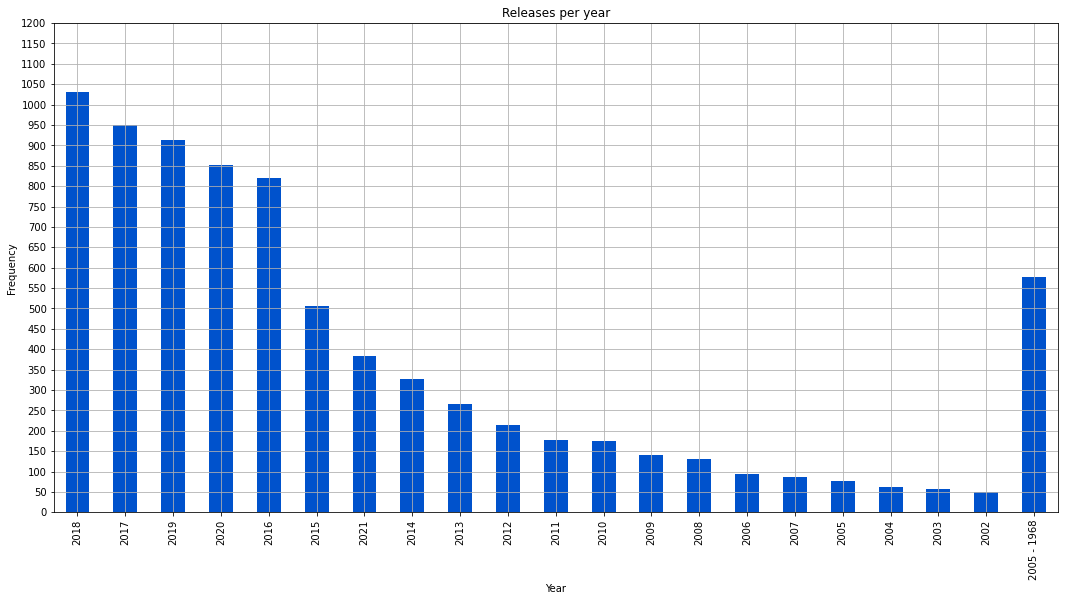

In [11]:
grid_lines = np.linspace(0.0,1200.0,25)
df_years.plot.bar(figsize=(18,9),title="Releases per year",xlabel="Year",
                  ylabel="Frequency",grid=True,yticks=grid_lines,color=['#0052CC'])

### 4. Categories

In [26]:
# Getting categories frequency in a dictionary
df_categories = np.asarray(df['categories'])
categories_dict = {}
for category in df_categories:
    categories = category.split(", ")
    for cat in categories:
        if cat in categories_dict.keys(): categories_dict[cat] = categories_dict[cat] + 1
        else: categories_dict[cat] = 0

# Sorting dictionary
categories_dict = sorted(categories_dict.items(),key=lambda x:x[1])
sorted_categories_dict = dict(categories_dict)

<AxesSubplot:title={'center':'Most frequent categories'}, xlabel='Category', ylabel='Frequency'>

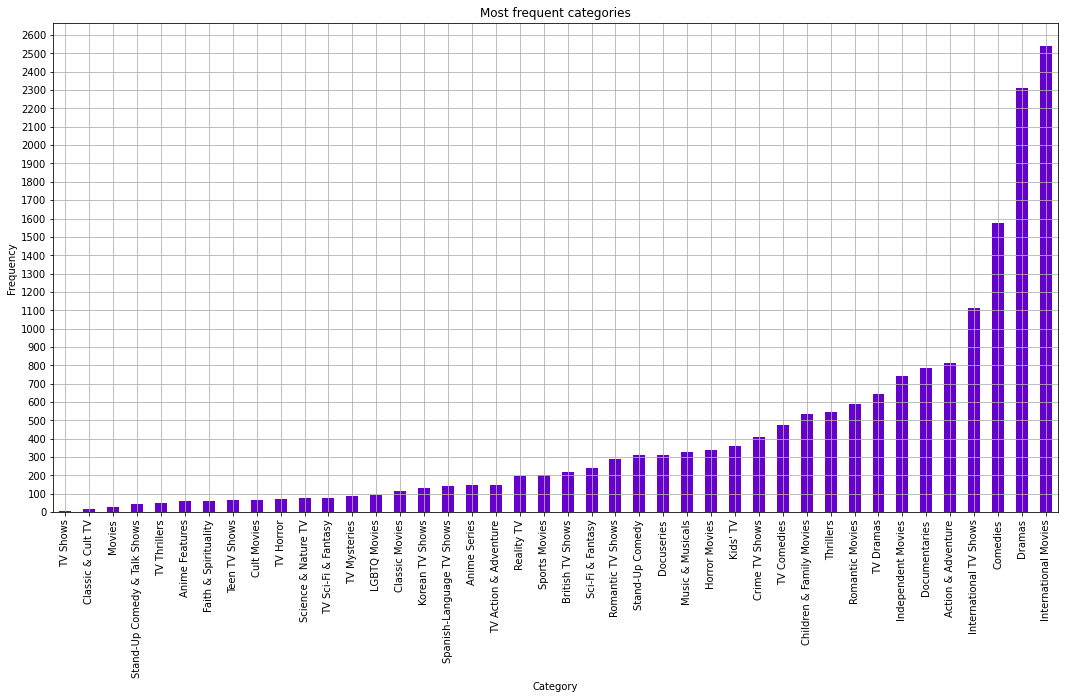

In [37]:
categories_series = pd.Series([x for x in sorted_categories_dict.values()],
                              index=[x for x in sorted_categories_dict.keys()])

categories_series.plot.bar(figsize=(18,9),title="Most frequent categories",
                            xlabel="Category",ylabel="Frequency",rot=90,grid=True,
                            yticks=np.linspace(0.0,2600.0,27),color=['#6600CC'])

## Exporting Clean data

In [ ]:
df.to_csv('NetflixCleanData.csv')